In [12]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [169]:
img = cv2.imread('../img_train2/'+df_train.Name[0], 0)
# clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(20,20))
# equ = clahe.apply(img)
# equ1 = cv2.distanceTransform(img,cv2.DIST_L1, 5)
# # equ = cv2.equalizeHist(img)
# res = np.hstack((img,equ1)) #stacking images side-by-side
# plt.imshow(res)

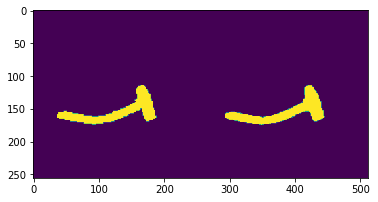

In [168]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
dilated = cv2.dilate(img, kernel)
equ=cv2.erode(dilated,kernel)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res)

In [175]:
def bold(img):
    kernel = np.ones((3,3),np.uint8)
#     erosion = cv2.erode(img,kernel,iterations = 1)
    dilation = cv2.dilate(img,kernel,iterations = 1)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closing)

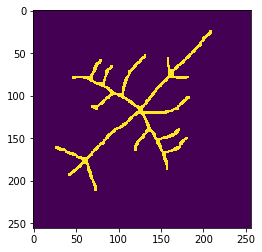

In [176]:
bold(img)

In [122]:
# from skimage.transform import rotate, AffineTransform, warp
# def shift(img):
#     h, w = img.shape[:2]
#     rows, cols = np.nonzero(img)
#     ll = np.random.randint(rows.max()-256, rows.min())
#     ul = np.random.randint(cols.max()-256, cols.min())
#     transform = AffineTransform(translation=(ll, ul))  # (-200,0) are x and y coordinate, change it see the effect
#     shifted_image = warp(img,transform, mode="wrap") 
#     return shifted_image

In [159]:
class Shift:
    def __init__(self, prob = 0.5, size = 256):
        self.prob = prob
        self.size = size

    def __call__(self, img, mask):
        if random.random() < self.prob:
            h, w = img.shape[:2]
            rows, cols = np.nonzero(img)
            x = np.random.randint(-150, 150)
            y = np.random.randint(-150, 150)
            transformationMatrix = np.float32([[1, 0, int(x)], [0, 1, int(y)]]) 
            (rows_img, cols_img) = img.shape[:2] 
            img = cv2.warpAffine(img, transformationMatrix, (cols_img, rows_img))
            mask = cv2.warpAffine(mask, transformationMatrix, (cols_img, rows_img))
  
        return img, mask

In [160]:
shift = Shift(1)

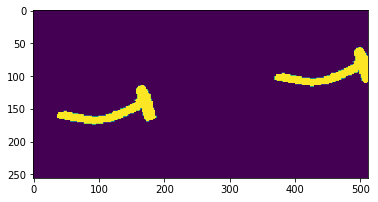

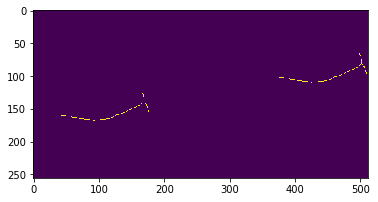

In [164]:
img = cv2.imread('../img_train_shape/'+df_train.Name[1], 0)
mask = cv2.imread('../img_train2/'+df_train.Name[1], 0)
shifted_img, shifted_mask = shift(img, mask)
res_img = np.hstack((img, shifted_img))
res_mask = np.hstack((mask, shifted_mask))
plt.imshow(res_img)
plt.show()
plt.imshow(res_mask)
plt.show()

In [150]:
# train2 = os.listdir("../img_train2")
# train = os.listdir("../img_train_shape")
# train2.remove('.DS_Store')
# train.remove('.DS_Store')
# df = pd.DataFrame(columns = ['Name', 'Class'])
# df.Name = train
# for i in range(len(df)):
#     df.Class[i] = df.Name[i].split('-')[0]
# len(np.unique(df.Class))

In [13]:
df_train = pd.read_csv('df_train.csv')
df_val = pd.read_csv('df_val.csv')

In [10]:
df.to_csv("df.csv", index = False)
train.to_csv("df_train.csv", index=False)
val.to_csv("df_val.csv", index=False)

In [7]:
train, val = train_test_split(df, test_size=0.2, random_state=42, stratify = df.Class)

In [6]:
new_df = pd.get_dummies(df.Class)
df = pd.concat([df, new_df], axis = 1)
df

,Name,Class,Bone,Comma,Glas,HCircle,Heart,Misk,apple,barbell,...,spoon,spring,stef,teddy,textbox,tool,tree,truck,turtle,watch
0,textbox-60.png,textbox,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,chicken-17.png,chicken,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,flightbird-18.png,flightbird,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fish-32.png,fish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,guitar-19.png,guitar,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tree-15.png,tree,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,dino-11-aug-21.png,dino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,dog-28.png,dog,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,man-1.png,man,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,device4-11.png,device4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.reset_index(drop=True, inplace = True)
val.reset_index(drop=True, inplace = True)

In [38]:
import shutil

In [39]:
for i in range(len(train)):
    shutil.copy('../img_train_shape/'+train.Name.loc[i], 'CVPR_dataset/train/images/')
    shutil.copy('../img_train2/'+train.Name.loc[i], 'CVPR_dataset/train/masks/')
for i in range(len(val)):
    shutil.copy('../img_train_shape/'+val.Name.loc[i], 'CVPR_dataset/val/images/')
    shutil.copy('../img_train2/'+val.Name.loc[i], 'CVPR_dataset/val/masks/')

In [40]:
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

if __name__ == '__main__':
    zipf = zipfile.ZipFile('CVPR_dataset.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('CVPR_dataset/', zipf)
    zipf.close()

In [23]:
new_df = pd.DataFrame(columns = ["Name", "Count"])
new_df.Name = list(df.Class.value_counts().index)
new_df.Count = df.Class.value_counts().values
for i in range(len(new_df)):
    df_aug = df[df.Class == new_df.Name[i]].reset_index(drop=True)
    name = df_aug.sample().Name.values[0].split('.')[0]
    img = cv2.imread('../img_train_shape/'+name+".png")
    mask = cv2.imread('../img_train2/'+name+".png")
    print(name)
    if(new_df.Count.loc[i] < 10):
        img = cv2.flip(img, 1)
        mask = cv2.flip(mask, 1)
        img2 = cv2.flip(img, 0)
        mask2 = cv2.flip(mask, 0)
        cv2.imwrite('../img_train_shape/'+name+"-aug"+str(0)+".png", img)
        cv2.imwrite("../img_train2/"+name+"-aug"+str(0)+".png", mask)
        cv2.imwrite('../img_train_shape/'+name+"-aug-2"+str(1)+".png", img2)
        cv2.imwrite("../img_train2/"+name+"-aug-2"+str(1)+".png", mask2)

dog-17
fish-30
textbox-21
bird-46
hammer-22
cat-33
tool-20
ray-15
doodle-19
greeble-29
hand-11
plane-22
bottle-12
truck-09
teddy-17
fountain-12
brick-07
car-14
rat-19
carriage-11
stef-17
chopper-06
dude-16
spoon-19
device4-12
butterfly-12
device8-12
cellular_phone-19
tree-11
Bone-19
pencil-16
HCircle-1
hat-1
Comma-18
sea_snake-20
shoe-16
horseshoe-19
flatfish-15
apple-16
bell-11
guitar-18
classic-14
children-19
key-19
personal_car-14
watch-12
Heart-11
Misk-17
bat-13
jar-12
device3-15
face-14
fork-15
frog-16
pocket-1
device2-12
device5-15
lmfish-14
Glas-11
device6-1
turtle-16
bunny-20
octopus-15
device0-20
device7-1
flightbird-13
device1-12
camel-20
device9-16
lizzard-17
cattle-18
beetle-17
crown-17
deer-11
chicken-17
elephant-19
dino-11
fly-2
horse-17
spring-17
cow-2
shark-2
man-1
bonefishes-1
dancer-2
barbell-2
mhorse-1
calf-1
donkey-1
cup-17


# Visualization

In [38]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, columns*rows +1, 2):
    name = random.choice(train)
    img = cv2.imread('../img_train_shape/'+name)
    mask = cv2.imread('../img_train2/'+name)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(mask)
plt.show()

KeyError: 928

<Figure size 1080x1080 with 0 Axes>

In [54]:
for i in random.choices(train, k = 10):
    mask = cv2.imread('../img_train2/'+i)
    img = cv2.imread('../img_train_shape/'+i)
    print(mask.shape, img.shape)

(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)
(256, 256, 3) (256, 256, 3)


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
test = glob.glob("../img_test_shape/*.png")

In [64]:
train, val = train_test_split(train, test_size=0.2, random_state=1)

In [61]:
train[0]

'textbox-60.png'

In [60]:
train[0].split("-")

['textbox', '60.png']

In [57]:
len(test)

241

In [55]:
for i in range(10):
    print(cv2.imread(test[i]).shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


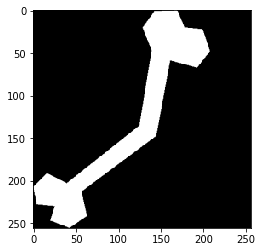

In [48]:
plt.imshow(cv2.imread(test[1]))